In [25]:
import tensorflow as tf
from tensorflow import keras

In [26]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
len(X_train)

60000

In [28]:
len(X_test)

10000

In [29]:
X_train[0].shape

(28, 28)

5


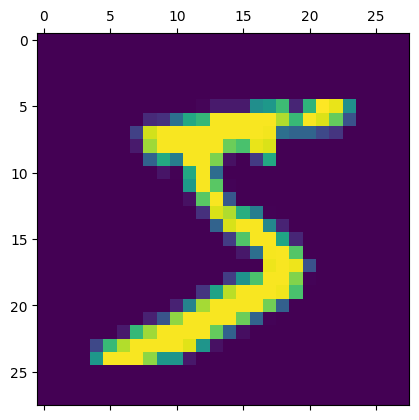

In [30]:
from matplotlib import pyplot as plt
%matplotlib inline
print(y_train[0])
plt.matshow(X_train[0])

In [31]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [32]:
X_train = X_train / 255
X_test = X_test / 255

In [33]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [34]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [35]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [36]:
print(X_train_flattened.shape)
print(X_test_flattened.shape)

(60000, 784)
(10000, 784)


In [37]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 724us/step - accuracy: 0.8131 - loss: 0.7209
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9134 - loss: 0.3120
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 818us/step - accuracy: 0.9204 - loss: 0.2852
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 777us/step - accuracy: 0.9232 - loss: 0.2755
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 763us/step - accuracy: 0.9244 - loss: 0.2681


In [38]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.9151 - loss: 0.3046


[0.26854172348976135, 0.9262999892234802]

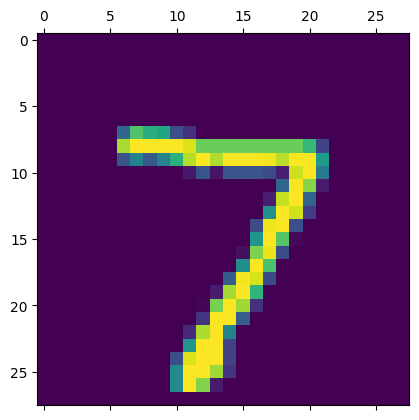

In [39]:
plt.matshow(X_test[0])

In [40]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step


array([2.1980941e-02, 5.1037819e-07, 7.8248262e-02, 9.6121627e-01,
       2.9088962e-03, 1.5262747e-01, 1.6617744e-06, 9.9984932e-01,
       9.3012407e-02, 7.4991679e-01], dtype=float32)

In [41]:
import numpy as np
np.argmax(y_predicted[0])

7

In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    0,    2,    0,    4,    6,    2,    2,    1],
       [   0, 1118,    3,    2,    0,    1,    4,    2,    5,    0],
       [   7,   12,  910,   17,    8,    4,   13,   10,   46,    5],
       [   4,    0,   15,  918,    0,   24,    2,   11,   28,    8],
       [   1,    1,    2,    1,  909,    0,   12,    4,   10,   42],
       [   8,    3,    1,   24,   11,  771,   18,    6,   42,    8],
       [  11,    3,    5,    1,    8,   10,  914,    2,    4,    0],
       [   1,    7,   20,    7,    4,    0,    0,  953,    3,   33],
       [   6,   14,    5,   16,    9,   17,    8,   12,  881,    6],
       [  10,    7,    1,    9,   22,    6,    0,   20,    8,  926]])>

Text(50.722222222222214, 0.5, 'Truth')

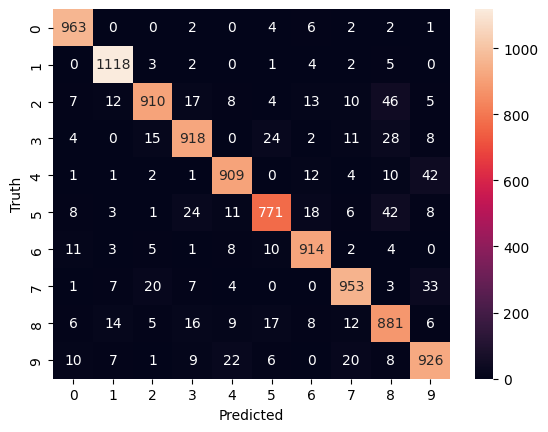

In [47]:
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [48]:
model = keras.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8741 - loss: 0.4450
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9624 - loss: 0.1310
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0833
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9814 - loss: 0.0625
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0498


In [49]:
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.9726 - loss: 0.0888


[0.0768185555934906, 0.9761999845504761]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 795us/step


Text(50.722222222222214, 0.5, 'Truth')

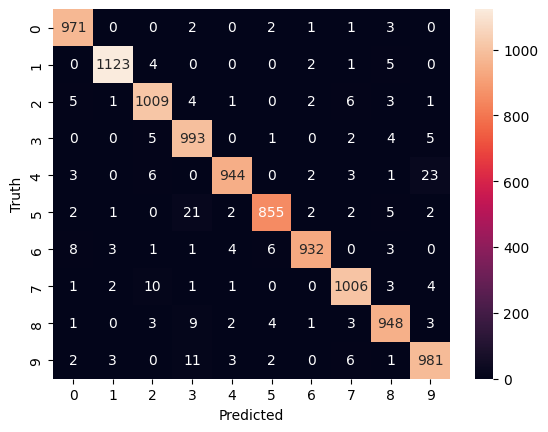

In [50]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [51]:
model = keras.Sequential([
    keras.layers.Input(shape=(28,28)),
    keras.layers.Flatten(),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8734 - loss: 0.4506
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9627 - loss: 0.1282
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9753 - loss: 0.0826
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9803 - loss: 0.0633
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9866 - loss: 0.0446
